<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/CaGraph/main/figures/icon.png" width="25%" style="padding: 20px">
</div>

# Generating and analyzing functional graphs of calcium imaging data

Developer: Veronica Porubsky <br>
Correspondence: verosky@uw.edu <br>
Example data provided by: Eric Zhang and Dr. Sean Piantadosi, Bruchas Lab, University of Washington<br>

This notebook implements a subset of the preprocessing functionality provided by the Python package, cagraph. This package is designed to construct functional graphs using timeseries data of neurons recorded with calcium imaging. <br>

**Quick Links:** https://github.com/vporubsky/CaGraph


# Installations and imports  <a class="anchor" id="installations-imports"></a>

In [1]:
# Import cagraph preprocess functionality
import preprocess as prep

# Additional useful imports and display setup for Jupyter notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 150)
import os

# Set path and filename  <a class="anchor" id="path-filename"></a>

In [2]:
# Set path to datasets for example analysis
DATA_PATH = os.getcwd() + '/datasets/'

# Select file to use as dataset to generate graph examples
FILENAME = 'bla_dataset.csv'


# Load and visualize raw calcium imaging data  <a class="anchor" id="load-data"></a>

In [3]:
# Generate graph object from numpy.ndarray
data = np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')
print(f"This dataset contains {data.shape[0] - 1} neurons and {data.shape[1]} timepoints.")

# Visualize raw data using pandas.DataFrame
df = pd.DataFrame(data)
build_index = ['time']
for i in range(data.shape[0] - 1):
    build_index.append('neuron ' + str(i))
df.index = build_index
display(df)

This dataset contains 39 neurons and 17987 timepoints.


,0,1,2,3,4,...,17982,17983,17984,17985,17986
time,0.100000,0.2000,0.300000,0.400000,0.500000,...,1.798300e+03,1.798400e+03,1.798500e+03,1.798600e+03,1.798700e+03
neuron 0,2.331200,2.2932,2.255900,2.219100,2.183000,...,1.131100e+01,1.112700e+01,1.094500e+01,1.076700e+01,1.059200e+01
neuron 1,5.134400,5.0265,4.920800,4.817400,4.716100,...,3.190500e-01,3.123500e-01,3.057800e-01,2.993600e-01,2.930600e-01
neuron 2,0.000000,0.0000,0.000000,0.000000,0.000000,...,4.707700e+00,4.684200e+00,4.660900e+00,1.245300e+01,1.239100e+01
neuron 3,2.732700,2.7124,2.692200,2.672200,2.652300,...,1.447500e-01,1.436700e-01,1.426000e-01,1.415400e-01,1.404900e-01
...,...,...,...,...,...,...,...,...,...,...,...
neuron 34,2.010200,1.9488,1.889300,1.831600,1.775700,...,4.543200e-12,4.404500e-12,4.270100e-12,4.139700e-12,4.013300e-12
neuron 35,0.000000,0.0000,0.000000,0.000000,0.000000,...,1.348200e-57,1.228000e-57,1.118500e-57,1.018700e-57,9.278800e-58
neuron 36,0.009955,0.0097,0.009451,0.009209,0.008972,...,2.279400e+00,2.220900e+00,2.163900e+00,2.108400e+00,2.054300e+00
neuron 37,0.000000,0.0000,0.000000,0.000000,0.000000,...,4.758200e-07,4.698000e-07,4.638500e-07,4.579800e-07,4.521900e-07


# Load data and user-supplied event data  <a class="anchor" id="preprocessing"></a>

In [4]:
# Generate shuffled dataset across individual neurons
data = np.genfromtxt(DATA_PATH + 'bla_dataset.csv', delimiter=',')

# event_data will contain a matrix with a time row and all neuron rows as in the data array
# each row, column index in the neuron rows will contain either 0 if no event was detected in that time period
# or 1 if an event was detected
event_data = np.genfromtxt(DATA_PATH + 'bla_events.csv', delimiter=',') # same size as data array

# User-supplied event data (MCMC spike inference)  <a class="anchor" id="preprocessing"></a>

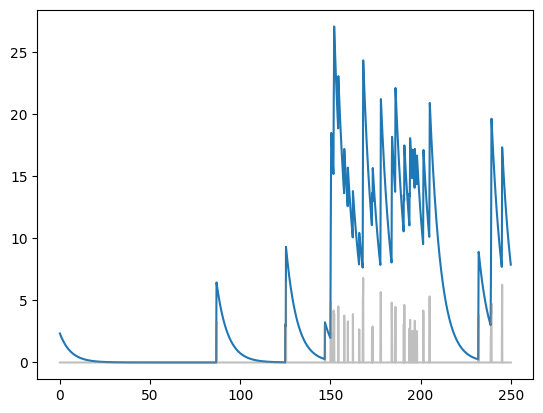

In [5]:
# Plot event_data on top of data
plt.figure()
plt.plot(data[0, 0:2500], data[1, 0:2500])
plt.plot(event_data[0, 0:2500], event_data[1,0:2500], 'grey', alpha=0.5)
plt.show()

# Preprocess event data  <a class="anchor" id="preprocessing"></a>

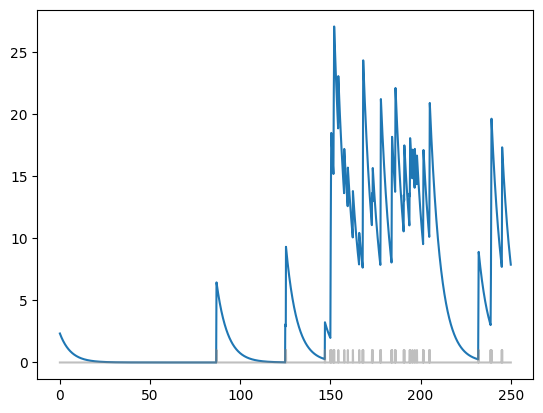

In [6]:
# Generate event data using preprocess function get_events()
event_data = prep.get_events(data=data.copy())

plt.figure()
plt.plot(data[0, 0:2500], data[1, 0:2500])
plt.plot(event_data[0, 0:2500], event_data[1,0:2500], 'grey', alpha=0.5)
plt.show()

# Generate shuffled datasets  <a class="anchor" id="preprocessing"></a>

In [7]:
# Generate shuffled dataset using user-identified events
shuffled_data = prep.generate_event_shuffle(data=data.copy(), event_data=event_data)

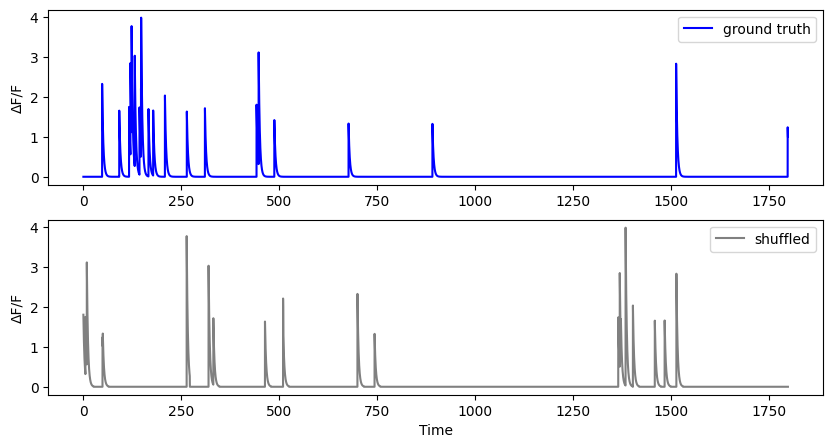

In [8]:
# Plot example shuffled trace
prep.plot_shuffle_example(data=data.copy(), shuffled_data=shuffled_data)

# Compare user-supplied MCMC to preprocess shuffled dataset correlations  <a class="anchor" id="preprocessing"></a>

In [9]:
# Shuffle the data using user-identified events
user_event_data = np.genfromtxt(DATA_PATH + 'bla_events.csv', delimiter=',') 
user_shuffled_data = prep.generate_event_shuffle(data=data.copy(), event_data=user_event_data)

# Shuffle the data using preprocess get_events()
prep_event_data = prep.get_events(data=data.copy())
prep_shuffled_data = prep.generate_event_shuffle(data=data.copy(), event_data=prep_event_data)

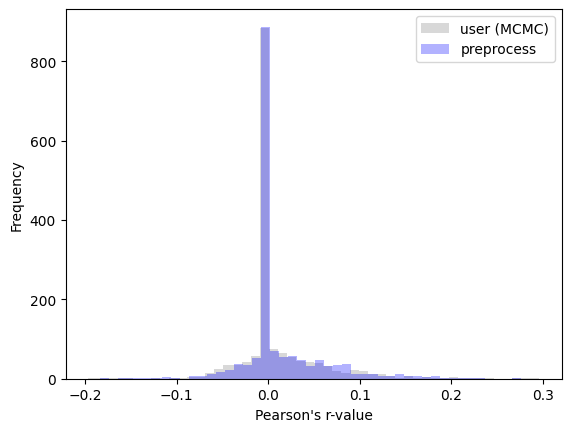

In [10]:
# Plot histograms of shuffled distribution correlations with supplied events (MCMC) and package get_events() function
prep.plot_correlation_hist(user_shuffled_data, prep_shuffled_data, colors=['grey', 'blue'], legend=['user (MCMC)', 'preprocess'])


# Compute recommended threshold for dataset <a class="anchor" id="preprocessing"></a>

/Users/veronica_porubsky/GitHub/CaGraph/preprocess.py:386: UserWarning: The KS-test performed on the shuffled and ground truth datasets show that the p-value is greater than a 5% significance level. Confirm that correlations in dataset are differentiable from random correlationsbefore setting a threshold.
  warnings.warn(


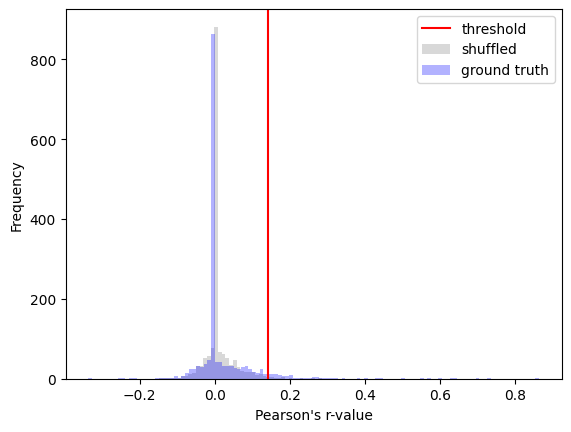

In [11]:
# Generate proposed threshold
threshold = prep.generate_threshold(data=data.copy(), shuffled_data=shuffled_data)

# Plot threshold
prep.plot_threshold(data=data.copy(), shuffled_data=shuffled_data)


# Compare to generic shuffle <a class="anchor" id="preprocessing"></a>

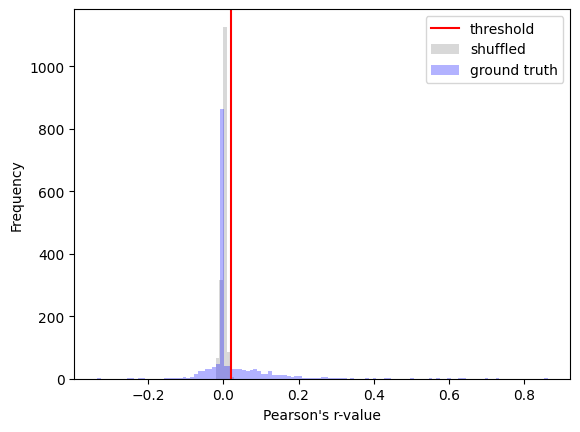

In [12]:
# Compare correlations to a generic noise shuffle
shuffled_data = prep.generate_noise_shuffle(data=data.copy())

# Plot threshold
prep.plot_threshold(data=data.copy(), shuffled_data=shuffled_data)
